# Modelisation segmentation olist

## Import des librairies

In [4]:
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings('ignore')  # ignore warnings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Import des données

In [7]:
df_segmentation = pd.read_csv('df_preprocessing.csv')
df_segmentation = df_segmentation.set_index('identifiant_client')
df_segmentation.head()

,récence,fréquence,montant,type_de_paiement_préféré,ville_client,état_client,jour_avec_plus_de_commandes,catégorie_préférée,dépense_maison,dépense_électronique,dépense_mode,dépense_loisirs,dépense_médias,dépense_auto_outils,dépense_santé_beauté,dépense_bébé_enfant,dépense_cuisine,dépense_sécurité_services
identifiant_client,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.828877,-0.163448,-0.055500,credit_card,cajamar,SP,Jeudi,bed_bath_table,0.387934,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.809219,-0.163448,-0.569596,credit_card,osasco,SP,Lundi,health_beauty,-0.220815,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,0.039188,-0.076728,-0.015137,-0.008562
0000f46a3911fa3c0805444483337064,1.962570,-0.163448,-0.337558,credit_card,sao jose,SC,Vendredi,stationery,-0.220815,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562
0000f6ccb0745a6a4b88665a16c9f078,0.547188,-0.163448,-0.536759,credit_card,belem,PA,Jeudi,telephony,-0.220815,0.029231,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562
0004aac84e0df4da2b147fca70cf8255,0.330950,-0.163448,0.176538,credit_card,sorocaba,SP,Mardi,telephony,-0.220815,0.361716,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562


## Modélisation clustering : Test de différents modèles 

Nous allons maintenant testé différents modèle de clustering et choisir le plus pertinant pour nos données. Pour tester le K-means, nous allons utiliser utiliser seulement, les variables numériques dans notre jeux de données, car en effet le l'algorithme k-means gère difficilement les variables catégorielles ce qui peut créer des résultats faussés.

### K-mean (sans ACP)

In [3]:
# Keep only numeric variable represented by float (int was categorical variable)
k_means_segmentation = df_segmentation.set_index('identifiant_client')
k_means_segmentation = k_means_segmentation.select_dtypes(include=['float64'])
k_means_segmentation.head()

,récence,fréquence,montant,dépense_maison,dépense_électronique,dépense_mode,dépense_loisirs,dépense_médias,dépense_auto_outils,dépense_santé_beauté,dépense_bébé_enfant,dépense_cuisine,dépense_sécurité_services
identifiant_client,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.828877,-0.163448,-0.055500,0.387934,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.809219,-0.163448,-0.569596,-0.220815,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,0.039188,-0.076728,-0.015137,-0.008562
0000f46a3911fa3c0805444483337064,1.962570,-0.163448,-0.337558,-0.220815,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562
0000f6ccb0745a6a4b88665a16c9f078,0.547188,-0.163448,-0.536759,-0.220815,0.029231,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562
0004aac84e0df4da2b147fca70cf8255,0.330950,-0.163448,0.176538,-0.220815,0.361716,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562


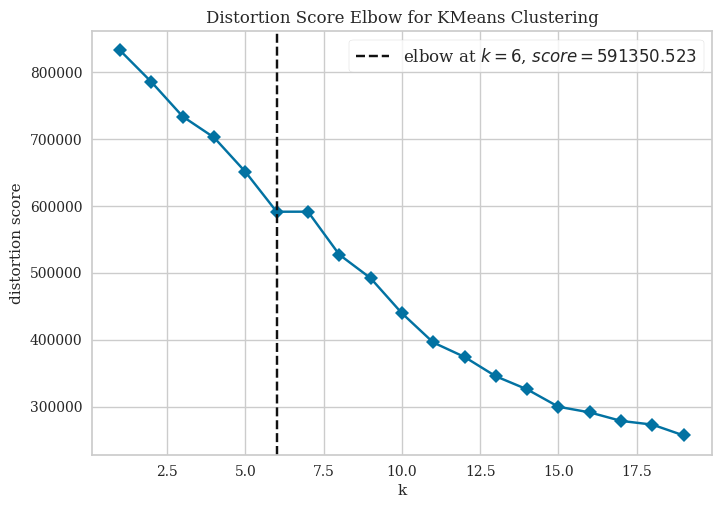

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 20), timings=False)

visualizer.fit(k_means_segmentation)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

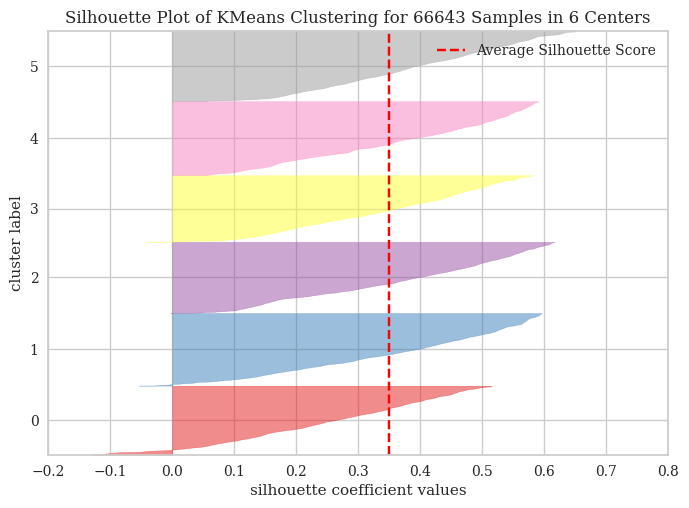

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 66643 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# Initialisation k-means
kmeans_without_acp = KMeans(n_clusters=6, init='k-means++', random_state=42)
visualizer = SilhouetteVisualizer(kmeans_without_acp, k=6)
visualizer.fit(k_means_segmentation)
label_without_acp = kmeans_without_acp.fit_predict(k_means_segmentation)
visualizer.show()

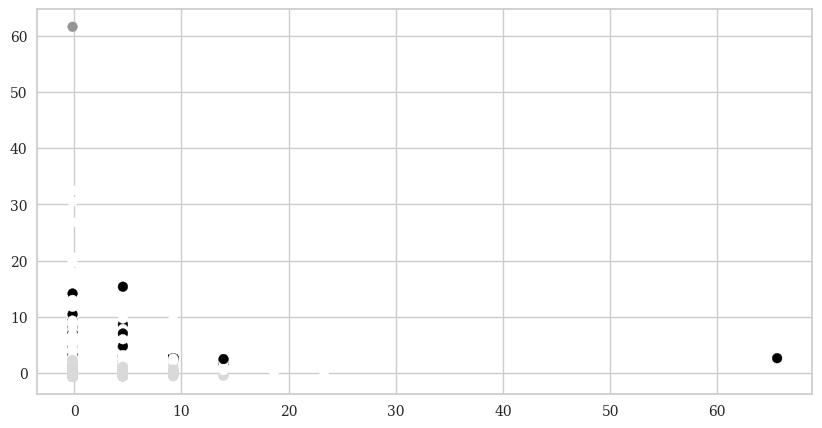

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(x=k_means_segmentation.iloc[:, 1],
            y=k_means_segmentation.iloc[:, 2], c=kmeans_without_acp.labels_)

### K-mean (avec ACP)

In [7]:
acp = PCA()
acp.fit(k_means_segmentation)

PCA()

In [8]:
acp.explained_variance_ratio_

array([0.13247956, 0.09719998, 0.09586213, 0.09062224, 0.08858891,
       0.08803025, 0.08098121, 0.07898235, 0.0779977 , 0.07331694,
       0.06388099, 0.02716295, 0.00489477])

([<matplotlib.axis.XTick at 0x7545d1885880>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

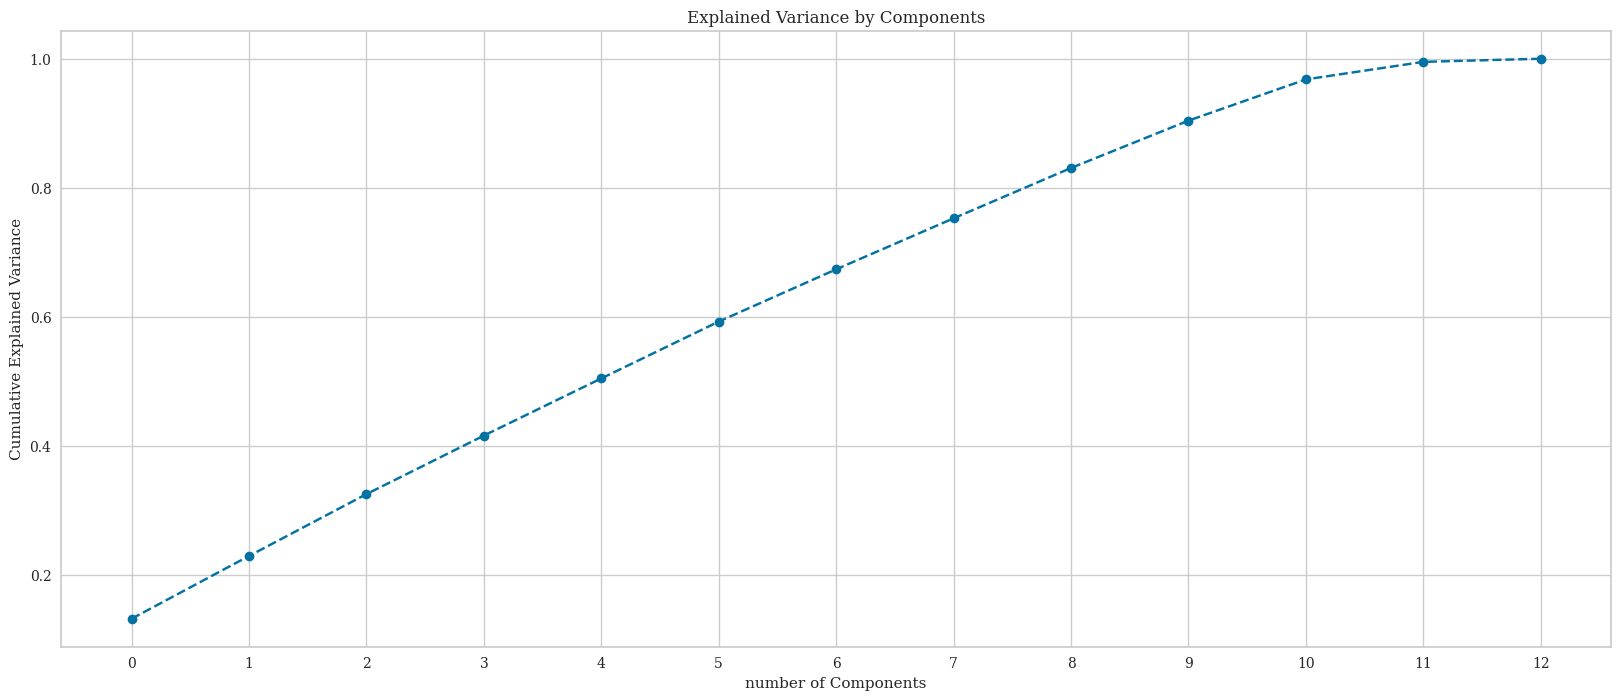

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(range(0, 13), acp.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(0, 13))

In [10]:
# Choose number of component ACP
acp = PCA(n_components=2)
# fit data with ACP
acp.fit(k_means_segmentation)

PCA(n_components=2)

In [11]:
score_acp_k_means = acp.transform(k_means_segmentation)

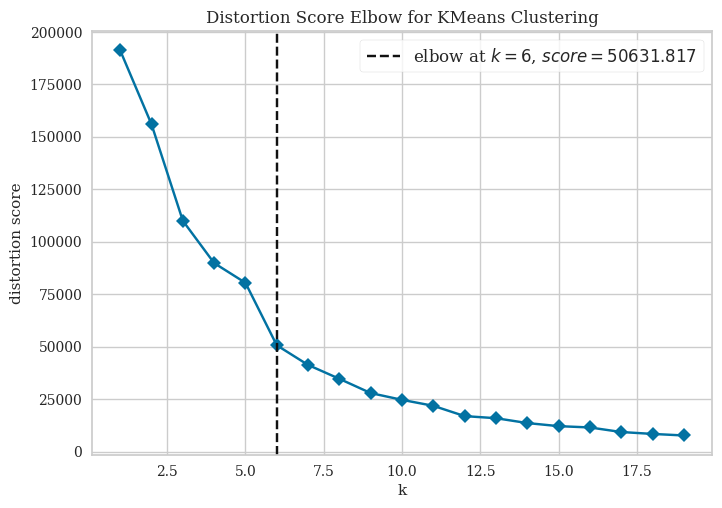

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 20), timings=False)

visualizer.fit(score_acp_k_means)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

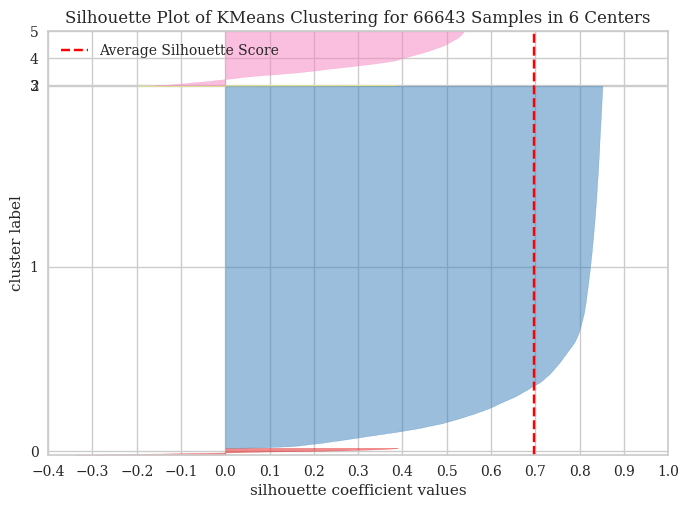

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 66643 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# Initialisation k-means
kmeans_with_acp = KMeans(n_clusters=6, init='k-means++', random_state=42)
visualizer = SilhouetteVisualizer(kmeans_with_acp, k=6)
visualizer.fit(score_acp_k_means)
visualizer.show()

In [14]:
df_segment_acp_kmeans = pd.concat([k_means_segmentation.reset_index(
    drop=True), pd.DataFrame(score_acp_k_means)], axis=1)
df_segment_acp_kmeans.columns.values[-2:] = ['component_1', 'component_2']
df_segment_acp_kmeans["segment_kmeans_acp"] = kmeans_with_acp.labels_
df_segment_acp_kmeans.head()

,récence,fréquence,montant,dépense_maison,dépense_électronique,dépense_mode,dépense_loisirs,dépense_médias,dépense_auto_outils,dépense_santé_beauté,dépense_bébé_enfant,dépense_cuisine,dépense_sécurité_services,component_1,component_2,segment_kmeans_acp
0,-0.828877,-0.163448,-0.055500,0.387934,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562,-0.164850,0.001026,1
1,-0.809219,-0.163448,-0.569596,-0.220815,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,0.039188,-0.076728,-0.015137,-0.008562,-0.588686,0.033604,1
2,1.962570,-0.163448,-0.337558,-0.220815,-0.065393,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562,-0.523687,-0.104106,1
3,0.547188,-0.163448,-0.536759,-0.220815,0.029231,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562,-0.590325,-0.040979,1
4,0.330950,-0.163448,0.176538,-0.220815,0.361716,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562,0.059257,-0.050855,1


In [15]:
df_segment_acp_kmeans['segment'] = df_segment_acp_kmeans['segment_kmeans_acp'].map(
    {0: 'premier', 1: 'deuxième', 2: 'troisième', 3: 'quatrième', 4: 'cinquième', 5: 'sixième'})

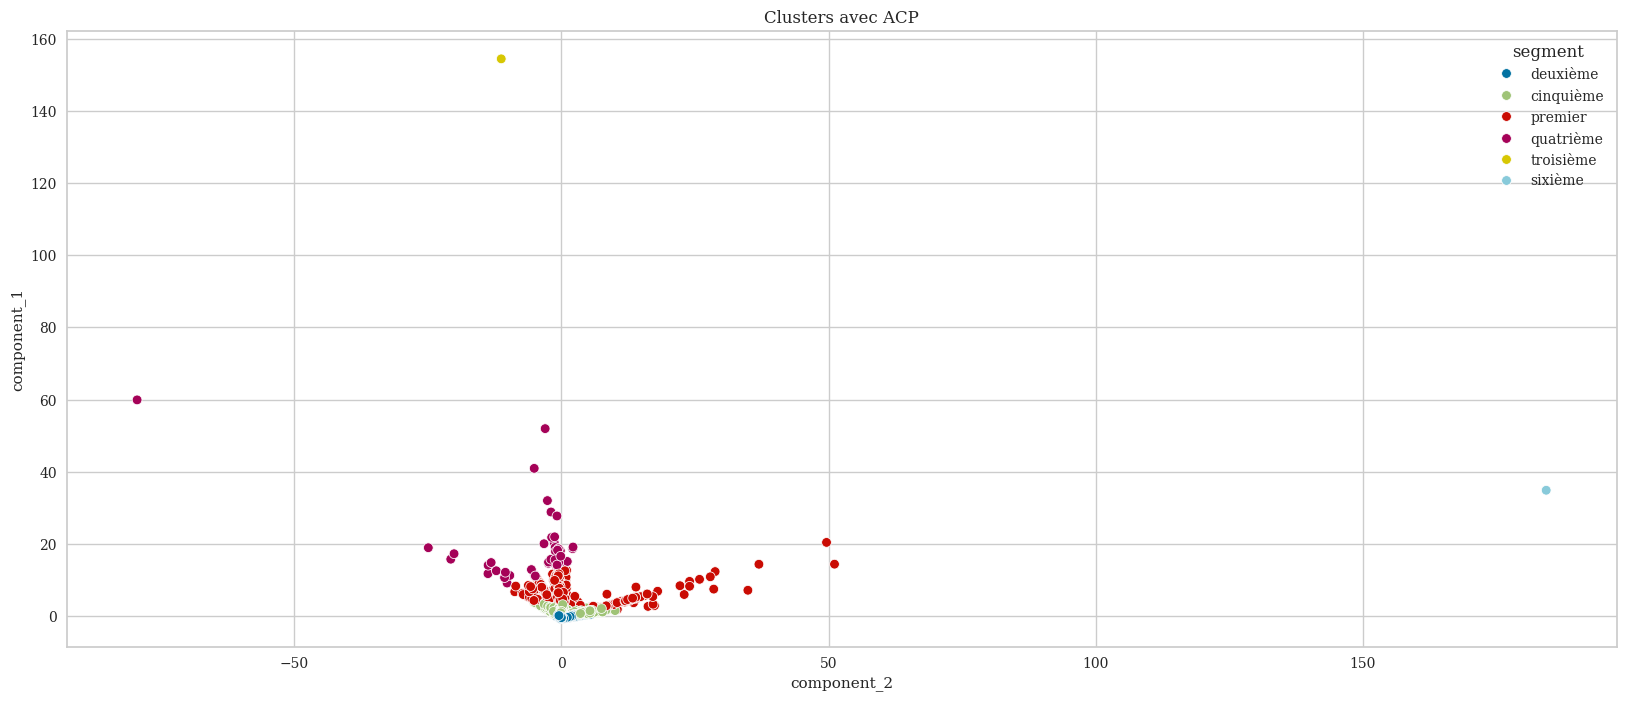

In [16]:
# Plot data by PCA component
x_axis = df_segment_acp_kmeans['component_2']
y_axis = df_segment_acp_kmeans['component_1']
plt.figure(figsize=(20, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segment_acp_kmeans['segment'])
plt.title('Clusters avec ACP')
plt.show()

In [17]:
df_segment_acp_kmeans['identifiant_client'] = df_segmentation['identifiant_client']
df_segment_acp_kmeans.set_index('identifiant_client')
df_cluster = df_segment_acp_kmeans[df_segment_acp_kmeans['segment'] == 'troisième']

In [18]:
display(df_cluster)

,récence,fréquence,montant,dépense_maison,dépense_électronique,dépense_mode,dépense_loisirs,dépense_médias,dépense_auto_outils,dépense_santé_beauté,dépense_bébé_enfant,dépense_cuisine,dépense_sécurité_services,component_1,component_2,segment_kmeans_acp,segment,identifiant_client
3726,0.632373,-0.163448,61.590171,-0.220815,237.06359,-0.159341,-0.203558,-0.058082,-0.102863,-0.200017,-0.076728,-0.015137,-0.008562,154.372014,-11.275442,2,troisième,0a0a92112bd4c708ca5fde585afaa872


### K-means (avec TSNE)

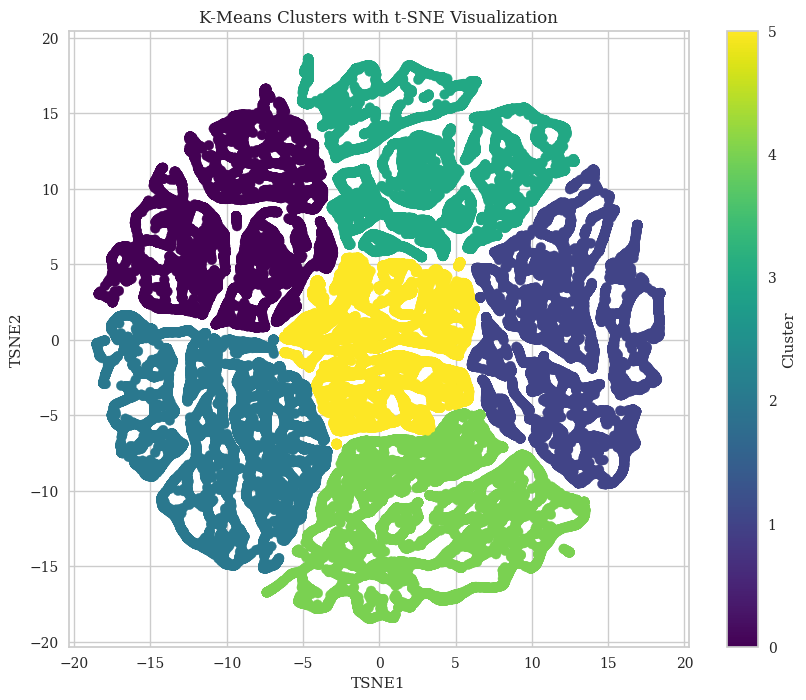

In [21]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Choose the number of clusters
k_means_segmentation['Cluster'] = kmeans.fit_predict(k_means_segmentation)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(k_means_segmentation)

# Add t-SNE results to the DataFrame
k_means_segmentation['TSNE1'] = tsne_results[:, 0]
k_means_segmentation['TSNE2'] = tsne_results[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(k_means_segmentation['TSNE1'], k_means_segmentation['TSNE2'],
            c=k_means_segmentation['Cluster'], cmap='viridis')
plt.title('K-Means Clusters with t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster')
plt.show()

## K-prototypes

In [15]:
# Step 1: Preprocess the data
categorical_columns = ['type_de_paiement_préféré', 'ville_client',
                       'état_client', 'jour_avec_plus_de_commandes', 'catégorie_préférée']
numerical_columns = df_segmentation.columns.difference(
    categorical_columns).tolist()

for col in categorical_columns:
    df_segmentation[col] = df_segmentation[col].astype('category')

X = df_segmentation[categorical_columns + numerical_columns].copy()

# Convert categorical columns to their codes
for col in categorical_columns:
    X[col] = X[col].cat.codes

# Get the indices of categorical columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_columns]

In [16]:

# Use KElbowVisualizer to find the optimal number of clusters
model = KPrototypes(random_state=42)

visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='distortion', timings=False
)
visualizer.fit(X, categorical=categorical_indices)
visualizer.show()

# Determine the optimal number of clusters
optimal_clusters = visualizer.elbow_value_
print(f'Optimal number of clusters: {optimal_clusters}')

### Silhouette analyse

In [ ]:
# Silhouette Analysis 
model = KPrototypes(n_clusters=optimal_clusters, random_state=42)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X, categorical=categorical_indices)
visualizer.show()

In [ ]:
# Apply K-Prototypes clustering with the optimal number of clusters
kproto = KPrototypes(n_clusters=optimal_clusters, random_state=42)
clusters = kproto.fit_predict(X, categorical=categorical_indices)

df_segmentation['Cluster_kproto'] = clusters

### Visualisation PCA

In [ ]:
# Visualize Clusters with PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)

df_segmentation['PCA1'] = pca_results[:, 0]
df_segmentation['PCA2'] = pca_results[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(df_segmentation['PCA1'], df_segmentation['PCA2'],
            c=df_segmentation['Cluster_kproto'], cmap='viridis')
plt.title('K-Prototypes Clusters with PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster_kproto')
plt.show()

### Visualisation TSNE 

In [ ]:
# Step 5: Visualize Clusters with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(X)

df_segmentation['TSNE1'] = tsne_results[:, 0]
df_segmentation['TSNE2'] = tsne_results[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(df_segmentation['TSNE1'], df_segmentation['TSNE2'],
            c=df_segmentation['Cluster'], cmap='viridis')
plt.title('K-Prototypes Clusters with t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster')
plt.show()